Here we will take a look how to eigenvalues of the Kernel change with different architectures of the NN, while keeping the same amount of total amount of parameters roughly the same

In [2]:
# Files and setup
using Flux, LinearAlgebra, Random, CairoMakie
include("DenseNTK.jl")
include("normNTK.jl")

Nθ(model) = sum(length, Flux.params(model)); # Calculate notal amount of params
eig(K) = abs.(eigen(K).values); # get eigen_values of Kernel

In [4]:
# Fake data
Nx=21
a=-1.0; b=1.0

xVec=collect(range(a,stop=b,length=Nx));
yVec=sin.(2*pi*xVec) .+ 0.1*randn(size(xVec)); 

In [6]:
# Find Nh for number of hidden layers
quad_solve(a,b) = (-b+sqrt(b^2 - (4*a*-30000)))/(2*a)
req_Nh(Lh) = quad_solve(Lh-1, Lh+2)
req_Nh(20)

39.16124070959959

In [8]:
Nh = 10000

Nh1 = Nh
m_Lh_1 = Chain(DenseNTK(1,Nh, relu), DenseNTK(Nh,1))

Nh2 = 171 # found via quadratic equation
m_Lh_2 = Chain(DenseNTK(1,Nh2,relu), DenseNTK(Nh2,Nh2,relu), DenseNTK(Nh2,1))

Nh5 = 85 # found via quadratic equation
m_Lh_5 = Chain(DenseNTK(1,Nh5,relu), DenseNTK(Nh5,Nh5,relu),  DenseNTK(Nh5,Nh5,relu),  DenseNTK(Nh5,Nh5,relu),  DenseNTK(Nh5,Nh5,relu), DenseNTK(Nh5,1))

LhExtra = 20
NhExtra = Int(round(req_Nh(LhExtra)))

# m_Lh_Extra = Chain(DenseNTK(1, NhExtra, relu))
# for i in 2:LhExtra
#     m_Lh_Extra = Chain(m_Lh_Extra, DenseNTK(NhExtra, NhExtra, relu))
# end
# m_Lh_Extra = Chain(m_Lh_Extra, DenseNTK(NhExtra, 1))


display(Nθ(m_Lh_1))
display(Nθ(m_Lh_2))
display(Nθ(m_Lh_5))
#display(Nθ(m_Lh_Extra))

30001

29926

29496

Eigenvalue review

In [10]:
K1 = kernel(m_Lh_1, hcat(xVec...),true);
K2 = kernel(m_Lh_2, hcat(xVec...),true);
K5 = kernel(m_Lh_5, hcat(xVec...),true);
#KExtra = kernel(m_Lh_Extra, hcat(xVec...),true);

Computing kernel: 100%|██████████████████████████████████████████████████| Time: 0:00:09
Computing kernel: 100%|██████████████████████████████████████████████████| Time: 0:00:09
Computing kernel: 100%|██████████████████████████████████████████████████| Time: 0:00:10


21×21 Matrix{Float64}:
 2.58065  2.57098  2.55787  2.54005  …  2.34779  2.35692  2.33933  2.33101
 2.57098  2.57818  2.56621  2.54983     2.36123  2.37154  2.35466  2.34706
 2.55787  2.56621  2.55595  2.54075     2.35957  2.37024  2.35358  2.3463
 2.54005  2.54983  2.54075  2.53461     2.35983  2.37055  2.35385  2.34698
 2.5384   2.54876  2.54047  2.53531     2.37159  2.38576  2.36676  2.35981
 2.52763  2.53865  2.53122  2.52687  …  2.37282  2.38746  2.36857  2.36196
 2.49683  2.50889  2.50253  2.49895     2.37348  2.38695  2.36735  2.36039
 2.48434  2.49718  2.4916   2.48873     2.37415  2.38802  2.36798  2.36148
 2.43955  2.45505  2.4503   2.44825     2.34914  2.38878  2.37402  2.36726
 2.40676  2.42227  2.41831  2.41648     2.34937  2.39111  2.37435  2.36962
 ⋮                                   ⋱                             ⋮
 2.37057  2.38411  2.38121  2.38043     2.44801  2.45789  2.4435   2.43981
 2.355    2.36773  2.365    2.36482     2.47226  2.48413  2.47372  2.46681
 2.35419 

In [11]:
eig1 = eig(K1)
eig2 = eig(K2)
eig5 = eig(K5)
#eigExtra = eig(KExtra);

21-element Vector{Float64}:
  0.0003650902007992769
  0.0005576849928575895
  0.0009525619504406229
  0.0015357757763608086
  0.0024328377119974148
  0.0034128924014276574
  0.004296520467258762
  0.006771667073242839
  0.00759778912802166
  0.0104459189265005
  ⋮
  0.016674177102928695
  0.018310243970982847
  0.0319382829978458
  0.05700516953385903
  0.0946293191578483
  0.18929932619544887
  0.327439472174796
  1.44255309395432
 51.09649079753749

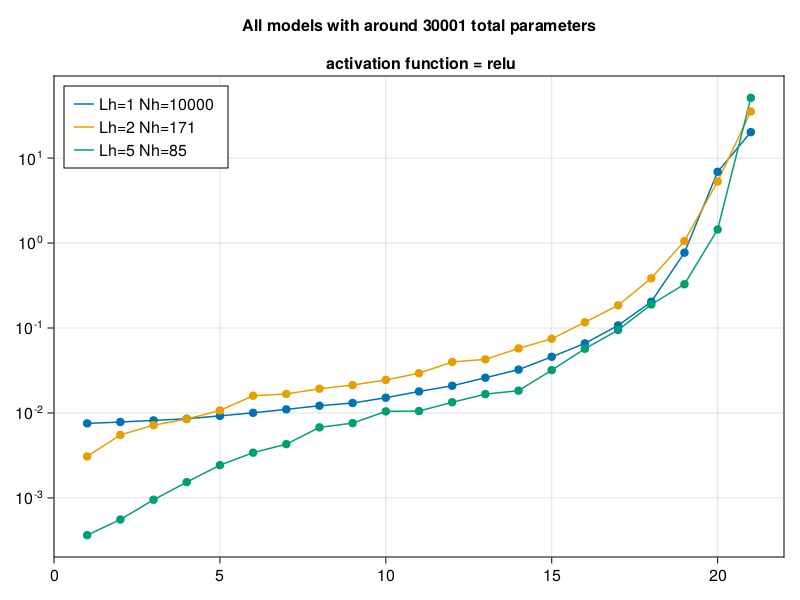

In [15]:
N = Nθ(m_Lh_1)


fig = Figure()
ax1 = Axis(fig[1,1], yscale=log10, title="All models with around $N total parameters\n\n activation function = relu")
CairoMakie.lines!(eig1, label="Lh=1 Nh=$Nh1 ")
CairoMakie.lines!(eig2, label="Lh=2 Nh=$Nh2")
CairoMakie.lines!(eig5, label="Lh=5 Nh=$Nh5")
#CairoMakie.lines!(eigExtra, label="Lh=$LhExtra Nh=$NhExtra")

CairoMakie.scatter!(eig1)
CairoMakie.scatter!(eig2)
CairoMakie.scatter!(eig5)
#CairoMakie.scatter!(eigExtra)

axislegend(ax1,position=:lt)
fig

<h1>Lets check for more datapoints and one hidden layers</h1>

In [16]:

Nh1 = 100
Nh2 = Nh1*10
Nh3 = Nh2*10
Nh4 = Nh3*10
Nh5 = Nh4*10

m_Nh1 = Chain(DenseNTK(1,Nh1, relu), DenseNTK(Nh1, 1))
m_Nh2 = Chain(DenseNTK(1,Nh2, relu), DenseNTK(Nh2, 1))
m_Nh3 = Chain(DenseNTK(1,Nh3, relu), DenseNTK(Nh3, 1))
m_Nh4 = Chain(DenseNTK(1,Nh4, relu), DenseNTK(Nh4, 1))
m_Nh5 = Chain(DenseNTK(1,Nh5, relu), DenseNTK(Nh5, 1));

In [17]:
# Fake data
Nx=21
a=-1.0; b=1.0

xVec=collect(range(a,stop=b,length=Nx));
yVec=sin.(2*pi*xVec) .+ 0.1*randn(size(xVec)); 

In [18]:
K_Nh1 = kernel(m_Nh1, hcat(xVec...), true)
K_Nh2 = kernel(m_Nh2, hcat(xVec...), true)
K_Nh3 = kernel(m_Nh3, hcat(xVec...), true)

Computing kernel: 100%|██████████████████████████████████████████████████| Time: 0:00:01
Computing kernel: 100%|██████████████████████████████████████████████████| Time: 0:00:10


21×21 Matrix{Float64}:
 2.07147   1.9528    1.83454   1.71707   …  0.405509  0.365536  0.328708
 1.9528    1.87549   1.76742   1.6599       0.439096  0.401661  0.366978
 1.83454   1.76742   1.69848   1.60118      0.475209  0.440582  0.408316
 1.71707   1.6599    1.60118   1.53733      0.512682  0.481297  0.451881
 1.59822   1.55079   1.50209   1.44868      0.555857  0.527564  0.500849
 1.48085   1.44279   1.40374   1.36041   …  0.604841  0.579875  0.556094
 1.364     1.33495   1.30517   1.27155      0.656985  0.635982  0.615773
 1.25355   1.23291   1.21181   1.1873       0.717022  0.700333  0.684047
 1.14618   1.13342   1.12048   1.10456      0.783043  0.771267  0.759503
 1.04134   1.0359    1.03055   1.02265      0.855037  0.848782  0.842148
 ⋮                                       ⋱                      ⋮
 0.764291  0.776832  0.79027   0.802471     1.09536   1.10939   1.12187
 0.687303  0.704538  0.722941  0.74054      1.18351   1.20544   1.22542
 0.619188  0.640621  0.663493  0.6859

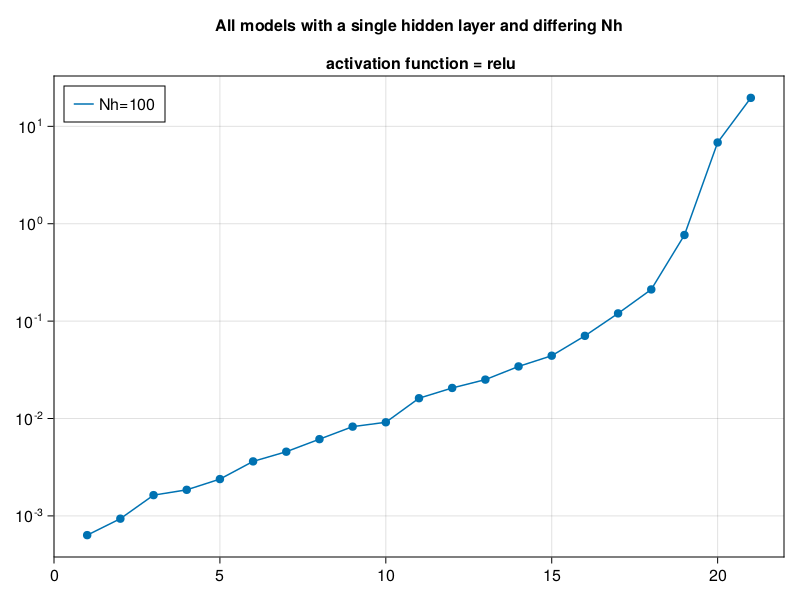

In [19]:
fig = Figure()
ax1 = Axis(fig[1,1], yscale=log10, title="All models with a single hidden layer and differing Nh\n\n activation function = relu")
#CairoMakie.lines!(eig(K_Nh3), label="Nh=$Nh3")
#CairoMakie.lines!(eig(K_Nh2), label="Nh=$Nh2")
CairoMakie.lines!(eig(K_Nh1), label="Nh=$Nh1")


#CairoMakie.scatter!(eig(K_Nh3))
#CairoMakie.scatter!(eig(K_Nh2))
CairoMakie.scatter!(eig(K_Nh1))



axislegend(ax1,position=:lt)
fig

<h1>Lets initialize each model 100 times</h1>

In [20]:
# Fake data
Nx=21
a=-1.0; b=1.0

xVec=collect(range(a,stop=b,length=Nx));
yVec=sin.(2*pi*xVec) .+ 0.1*randn(size(xVec)); 

In [56]:
T = 

eigNh1 = ones(Nx,T)
eigNh2 = ones(Nx,T)
eigNh3 = ones(Nx,T)


@showprogress desc="Computing eigenvalues..." for i = 1:T
    m_Nh1 = Chain(DenseNTK(1,Nh1, relu), DenseNTK(Nh1, 1))
    m_Nh2 = Chain(DenseNTK(1,Nh2, relu), DenseNTK(Nh2, 1))
    m_Nh3 = Chain(DenseNTK(1,Nh3, relu), DenseNTK(Nh3, 1))

    K_Nh1 = kernel(m_Nh1, hcat(xVec...))
    K_Nh2 = kernel(m_Nh2, hcat(xVec...))
    K_Nh3 = kernel(m_Nh3, hcat(xVec...))

    eigNh1[:,i] .= eig(K_Nh1)
    eigNh2[:,i] .= eig(K_Nh2)
    eigNh3[:,i] .= eig(K_Nh3)
end

    
    


Computing eigenvalues... 100%|███████████████████████████| Time: 0:12:38


In [58]:
### Saving eigenvalues
using JLD2

filename = "eigenvalues_T100_Nx21.jld2"

if isfile(filename)
    println("$filename already exists in directory\nPlease move it or change filename")
else
    @save filename eigNh1 eigNh2 eigNh3
end

### Loading eigenvalues
data = load(filename)

# Access the matrices from the loaded data
eigNh1_loaded = data["eigNh1"]
eigNh2_loaded = data["eigNh2"]
eigNh3_loaded = data["eigNh3"];

eigNh1 == eigNh1_loaded

<h1>Nx = 21</h1>

In [23]:
using JLD2
file = "eigenvalues_T100_Nx21.jld2"
data = load(file)

eig_Nh1_Nx21 = data["eigNh1"]
eig_Nh2_Nx21 = data["eigNh2"]
eig_Nh3_Nx21 = data["eigNh3"];

In [25]:
# Caculate the mean
using Statistics

eig_Nh1_Nx21_mean = ones(size(eig_Nh1_Nx21,1),1)
eig_Nh2_Nx21_mean = ones(size(eig_Nh1_Nx21,1),1)
eig_Nh3_Nx21_mean = ones(size(eig_Nh1_Nx21,1),1)

for t = 1:size(eig_Nh1_Nx21,1)
    rowNh1 = mean(eig_Nh1_Nx21[t,:])
    eig_Nh1_Nx21_mean[t,1] = rowNh1

    rowNh2 = mean(eig_Nh2_Nx21[t,:])
    eig_Nh2_Nx21_mean[t,1] = rowNh2

    rowNh3 = mean(eig_Nh3_Nx21[t,:])
    eig_Nh3_Nx21_mean[t,1] = rowNh3
end

<h1>Plot fyrir Nh1, Nx=21<h1>

1.3822137994156116

1.3634047581141302

1.3641316034854722

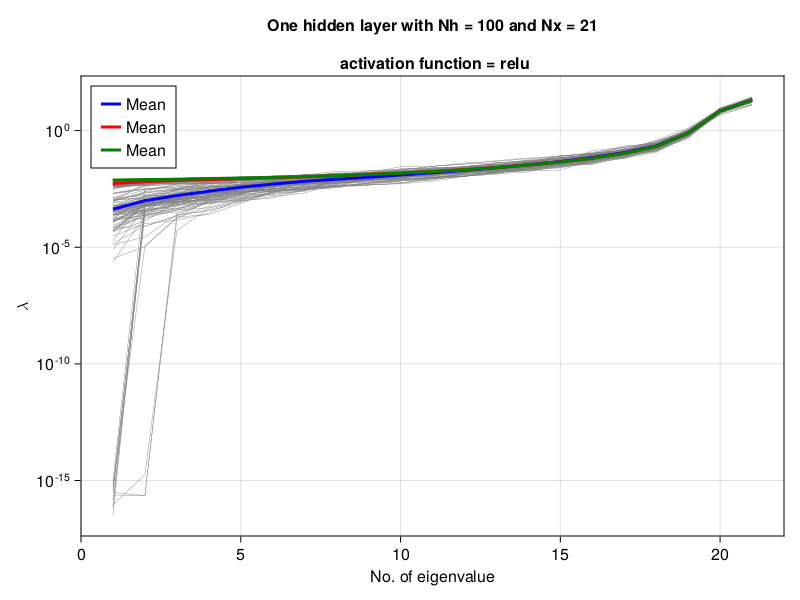

In [63]:
using ColorSchemes
using LaTeXStrings

fig = Figure()

Nh1 = size(eig_Nh1_Nx21,2)

ax1 = Axis(fig[1,1], yscale=log10, title="One hidden layer with Nh = $Nh1 and Nx = 21\n\n activation function = relu",
    xlabel = "No. of eigenvalue", ylabel =L"\lambda")

for t = 1:size(eig_Nh1_Nx21,2)
    CairoMakie.lines!(eig_Nh1_Nx21[:,t], color=:gray, linewidth=0.4)
end

# Mean
CairoMakie.lines!(eig_Nh1_Nx21_mean[:], label="Mean", color=:blue, linewidth=3)

axislegend(ax1,position=:lt)

fig

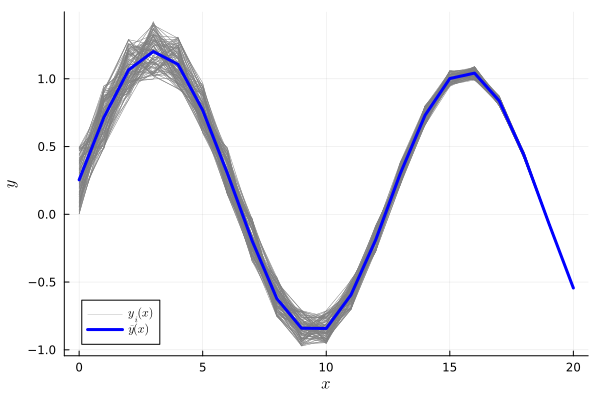

In [58]:
using LaTeXStrings
using Plots


Ns=100
Nx=21
Y=rand(Nx,Ns)
Yave=sum(Y,dims=2)/Ns
x=[0:20...]

Plots.plot(x,sin.(0.5*x) .+ 0.5*Y[:,1] .* (20 .- x )/20,color="gray",lw=0.2,label=L"y_i(x)")
for n=2:Ns
    Plots.plot!(x,sin.(0.5*x) .+ 0.5*Y[:,n] .* (20 .- x)/20,color="gray",lw=0.5,label="")
end
Plots.plot!(x,sin.(0.5*x) .+ 0.5*Yave .* (20 .- x)/20,color="blue",lw=3.0,label=L"$\bar{y}(x)$")
Plots.plot!(xlabel=L"$x$",ylabel=L"$y$")